## Importing Relavant Libraries

In [11]:
import re
import nltk
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

## Reading Dataset

In [4]:
data = pd.read_csv(r"data", sep="\t", names=["label", "mail"])
data.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


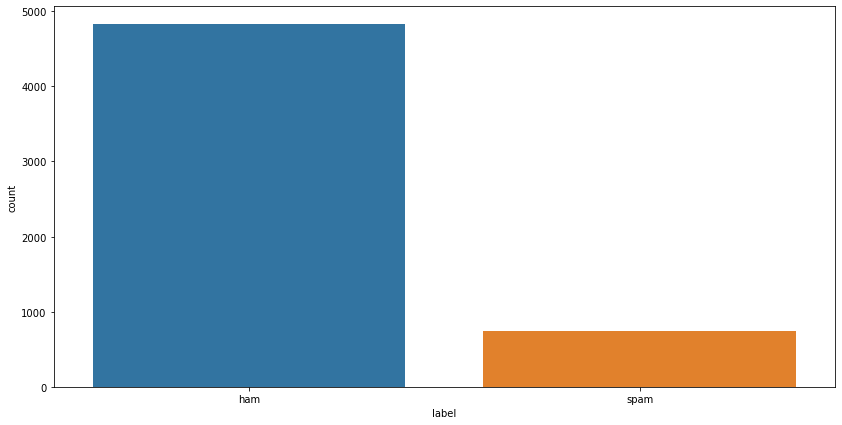

In [12]:
plt.figure(figsize=(14, 7))
sns.countplot(data.label)
plt.show()

## Data Preprocessing

In [13]:
stemmer = nltk.stem.PorterStemmer()
clean_data = []
for i in range(len(data)):
    temp = re.sub('[^a-zA-Z]', ' ', data["mail"][i]) # Removing Special words
    temp = temp.lower()
    temp = temp.split()
    temp = [stemmer.stem(word) for word in temp if word not in nltk.corpus.stopwords.words("english")] # Stemming th words
    temp = ' '.join(temp)
    clean_data.append(temp)

In [15]:
clean_data[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

## Feature Engineering

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)   # Usinf max_features argument we'll get just important features like important words that repeating in most of mails.
x = cv.fit_transform(clean_data).toarray()
x[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Encoding the label column data
def encoder(x):
    if x=='ham':
        return 0
    else:
        return 1

y = list(map(encoder, data["label"]))

## Preparing Model

In [16]:
# Spliting into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [17]:
# Fitting Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
result_table = confusion_matrix(y_test, y_pred)
print(result_table)

[[1428   29]
 [  18  197]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1457
           1       0.87      0.92      0.89       215

    accuracy                           0.97      1672
   macro avg       0.93      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy of the Model is ",round(score*100, 2), "%")

Accuracy of the Model is  97.19 %
